## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.utils import shuffle
import re
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.svm import NuSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt


### OPENING DATASET AND LOAD TO A DATAFRAME

In [2]:
file = open(
    "content.json", encoding='utf8')
data = json.load(file)
df = pd.DataFrame(data)
df.head()


,id,author,content,crawled_at,picture_count,processed,source,title,topic,url,category
0,2,Lâm Thỏa,"*Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...",2022-06-07 14:05:51.433712,2,0,None,HLV Malaysia dọa ngáng đường Việt Nam,Thể thao,https://vnexpress.net/hlv-malaysia-doa-ngang-d...,0
1,3,Thanh Tâm,"""Các khu dân cư của thành phố Severodonetsk đã...",2022-06-07 14:05:51.797545,2,0,None,Nga tuyên bố 'giải phóng' hoàn toàn khu dân cư...,Thế giới,https://vnexpress.net/nga-tuyen-bo-giai-phong-...,1
2,4,Thảo Mi,"Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...",2022-06-07 14:05:53.482540,2,0,None,Ông Tất Thành Cang được đề nghị giảm án,Pháp luật,https://vnexpress.net/ong-tat-thanh-cang-duoc-...,1
3,5,Quốc Thắng,"Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...",2022-06-07 14:05:53.848085,2,0,None,Nghi can sát hại cha bị bắt,Pháp luật,https://vnexpress.net/nghi-can-sat-hai-cha-bi-...,1
4,6,Vũ Hoàng,"Thủ tướng Anh Boris Johnson hôm 6/6 đã ""thoát ...",2022-06-07 14:05:54.226303,1,0,None,Sóng gió chờ đón Thủ tướng Anh hậu bỏ phiếu bấ...,Thế giới,https://vnexpress.net/thoat-hiem-bat-tin-nhiem...,1


### DROP UNNECESSARY COLUMNS

In [3]:
print(df.shape)
df = shuffle(df)
columns = ['id', 'crawled_at', 'processed', 'source', 'topic']
# Drop topic columns since it contributes a lot to the final output (category)
df = df.drop(columns=columns)


(19411, 11)


In [4]:
print(df.shape)


(19411, 6)


### SHOW COLUMNS' DATA TYPES AND COUNT NON-NULL VALUES

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19411 entries, 10531 to 16281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   author         19411 non-null  object
 1   content        19411 non-null  object
 2   picture_count  19411 non-null  int64 
 3   title          19411 non-null  object
 4   url            19411 non-null  object
 5   category       19411 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


As this project focus on content of the post, we would focus on content field.

In [6]:
content_array = np.array(df['content'])

Remove marks and lower case all words

In [7]:
corpus = []

for i in range(0, 19410):
    newArr = re.sub('/([\u0041-\u005A\u0061-\u007A\u00AA\u00B5\u00BA\u00C0-\u00D6\u00D8-\u00F6\u00F8-\u02C1\u02C6-\u02D1\u02E0-\u02E4\u02EC\u02EE\u0370-\u0374\u0376\u0377\u037A-\u037D\u0386\u0388-\u038A\u038C\u038E-\u03A1\u03A3-\u03F5\u03F7-\u0481\u048A-\u0527\u0531-\u0556\u0559\u0561-\u0587\u05D0-\u05EA\u05F0-\u05F2\u0620-\u064A\u066E\u066F\u0671-\u06D3\u06D5\u06E5\u06E6\u06EE\u06EF\u06FA-\u06FC\u06FF\u0710\u0712-\u072F\u074D-\u07A5\u07B1\u07CA-\u07EA\u07F4\u07F5\u07FA\u0800-\u0815\u081A\u0824\u0828\u0840-\u0858\u08A0\u08A2-\u08AC\u0904-\u0939\u093D\u0950\u0958-\u0961\u0971-\u0977\u0979-\u097F\u0985-\u098C\u098F\u0990\u0993-\u09A8\u09AA-\u09B0\u09B2\u09B6-\u09B9\u09BD\u09CE\u09DC\u09DD\u09DF-\u09E1\u09F0\u09F1\u0A05-\u0A0A\u0A0F\u0A10\u0A13-\u0A28\u0A2A-\u0A30\u0A32\u0A33\u0A35\u0A36\u0A38\u0A39\u0A59-\u0A5C\u0A5E\u0A72-\u0A74\u0A85-\u0A8D\u0A8F-\u0A91\u0A93-\u0AA8\u0AAA-\u0AB0\u0AB2\u0AB3\u0AB5-\u0AB9\u0ABD\u0AD0\u0AE0\u0AE1\u0B05-\u0B0C\u0B0F\u0B10\u0B13-\u0B28\u0B2A-\u0B30\u0B32\u0B33\u0B35-\u0B39\u0B3D\u0B5C\u0B5D\u0B5F-\u0B61\u0B71\u0B83\u0B85-\u0B8A\u0B8E-\u0B90\u0B92-\u0B95\u0B99\u0B9A\u0B9C\u0B9E\u0B9F\u0BA3\u0BA4\u0BA8-\u0BAA\u0BAE-\u0BB9\u0BD0\u0C05-\u0C0C\u0C0E-\u0C10\u0C12-\u0C28\u0C2A-\u0C33\u0C35-\u0C39\u0C3D\u0C58\u0C59\u0C60\u0C61\u0C85-\u0C8C\u0C8E-\u0C90\u0C92-\u0CA8\u0CAA-\u0CB3\u0CB5-\u0CB9\u0CBD\u0CDE\u0CE0\u0CE1\u0CF1\u0CF2\u0D05-\u0D0C\u0D0E-\u0D10\u0D12-\u0D3A\u0D3D\u0D4E\u0D60\u0D61\u0D7A-\u0D7F\u0D85-\u0D96\u0D9A-\u0DB1\u0DB3-\u0DBB\u0DBD\u0DC0-\u0DC6\u0E01-\u0E30\u0E32\u0E33\u0E40-\u0E46\u0E81\u0E82\u0E84\u0E87\u0E88\u0E8A\u0E8D\u0E94-\u0E97\u0E99-\u0E9F\u0EA1-\u0EA3\u0EA5\u0EA7\u0EAA\u0EAB\u0EAD-\u0EB0\u0EB2\u0EB3\u0EBD\u0EC0-\u0EC4\u0EC6\u0EDC-\u0EDF\u0F00\u0F40-\u0F47\u0F49-\u0F6C\u0F88-\u0F8C\u1000-\u102A\u103F\u1050-\u1055\u105A-\u105D\u1061\u1065\u1066\u106E-\u1070\u1075-\u1081\u108E\u10A0-\u10C5\u10C7\u10CD\u10D0-\u10FA\u10FC-\u1248\u124A-\u124D\u1250-\u1256\u1258\u125A-\u125D\u1260-\u1288\u128A-\u128D\u1290-\u12B0\u12B2-\u12B5\u12B8-\u12BE\u12C0\u12C2-\u12C5\u12C8-\u12D6\u12D8-\u1310\u1312-\u1315\u1318-\u135A\u1380-\u138F\u13A0-\u13F4\u1401-\u166C\u166F-\u167F\u1681-\u169A\u16A0-\u16EA\u1700-\u170C\u170E-\u1711\u1720-\u1731\u1740-\u1751\u1760-\u176C\u176E-\u1770\u1780-\u17B3\u17D7\u17DC\u1820-\u1877\u1880-\u18A8\u18AA\u18B0-\u18F5\u1900-\u191C\u1950-\u196D\u1970-\u1974\u1980-\u19AB\u19C1-\u19C7\u1A00-\u1A16\u1A20-\u1A54\u1AA7\u1B05-\u1B33\u1B45-\u1B4B\u1B83-\u1BA0\u1BAE\u1BAF\u1BBA-\u1BE5\u1C00-\u1C23\u1C4D-\u1C4F\u1C5A-\u1C7D\u1CE9-\u1CEC\u1CEE-\u1CF1\u1CF5\u1CF6\u1D00-\u1DBF\u1E00-\u1F15\u1F18-\u1F1D\u1F20-\u1F45\u1F48-\u1F4D\u1F50-\u1F57\u1F59\u1F5B\u1F5D\u1F5F-\u1F7D\u1F80-\u1FB4\u1FB6-\u1FBC\u1FBE\u1FC2-\u1FC4\u1FC6-\u1FCC\u1FD0-\u1FD3\u1FD6-\u1FDB\u1FE0-\u1FEC\u1FF2-\u1FF4\u1FF6-\u1FFC\u2071\u207F\u2090-\u209C\u2102\u2107\u210A-\u2113\u2115\u2119-\u211D\u2124\u2126\u2128\u212A-\u212D\u212F-\u2139\u213C-\u213F\u2145-\u2149\u214E\u2183\u2184\u2C00-\u2C2E\u2C30-\u2C5E\u2C60-\u2CE4\u2CEB-\u2CEE\u2CF2\u2CF3\u2D00-\u2D25\u2D27\u2D2D\u2D30-\u2D67\u2D6F\u2D80-\u2D96\u2DA0-\u2DA6\u2DA8-\u2DAE\u2DB0-\u2DB6\u2DB8-\u2DBE\u2DC0-\u2DC6\u2DC8-\u2DCE\u2DD0-\u2DD6\u2DD8-\u2DDE\u2E2F\u3005\u3006\u3031-\u3035\u303B\u303C\u3041-\u3096\u309D-\u309F\u30A1-\u30FA\u30FC-\u30FF\u3105-\u312D\u3131-\u318E\u31A0-\u31BA\u31F0-\u31FF\u3400-\u4DB5\u4E00-\u9FCC\uA000-\uA48C\uA4D0-\uA4FD\uA500-\uA60C\uA610-\uA61F\uA62A\uA62B\uA640-\uA66E\uA67F-\uA697\uA6A0-\uA6E5\uA717-\uA71F\uA722-\uA788\uA78B-\uA78E\uA790-\uA793\uA7A0-\uA7AA\uA7F8-\uA801\uA803-\uA805\uA807-\uA80A\uA80C-\uA822\uA840-\uA873\uA882-\uA8B3\uA8F2-\uA8F7\uA8FB\uA90A-\uA925\uA930-\uA946\uA960-\uA97C\uA984-\uA9B2\uA9CF\uAA00-\uAA28\uAA40-\uAA42\uAA44-\uAA4B\uAA60-\uAA76\uAA7A\uAA80-\uAAAF\uAAB1\uAAB5\uAAB6\uAAB9-\uAABD\uAAC0\uAAC2\uAADB-\uAADD\uAAE0-\uAAEA\uAAF2-\uAAF4\uAB01-\uAB06\uAB09-\uAB0E\uAB11-\uAB16\uAB20-\uAB26\uAB28-\uAB2E\uABC0-\uABE2\uAC00-\uD7A3\uD7B0-\uD7C6\uD7CB-\uD7FB\uF900-\uFA6D\uFA70-\uFAD9\uFB00-\uFB06\uFB13-\uFB17\uFB1D\uFB1F-\uFB28\uFB2A-\uFB36\uFB38-\uFB3C\uFB3E\uFB40\uFB41\uFB43\uFB44\uFB46-\uFBB1\uFBD3-\uFD3D\uFD50-\uFD8F\uFD92-\uFDC7\uFDF0-\uFDFB\uFE70-\uFE74\uFE76-\uFEFC\uFF21-\uFF3A\uFF41-\uFF5A\uFF66-\uFFBE\uFFC2-\uFFC7\uFFCA-\uFFCF\uFFD2-\uFFD7\uFFDA-\uFFDC]+)/g', ' ', content_array[i])
    newArr = newArr.lower()

    newArr = newArr.split()
    newArr = ' '.join(newArr)
    newArr = re.sub(r'[0-9]+', '', newArr)
    corpus.append(newArr)
    if i == 0:
        print(newArr)


được mệnh danh là thế hệ từ khi sinh ra đã không thể tách rời internet, mọi hoạt động mua sắm của mẹ bỉm gen z đều gắn với các nền tảng mạng xã hội và sự phát triển của công nghệ với ưu điểm nhanh chóng, tiện lợi, hiệu quả. thế hệ này cũng được biết đến với khả năng nắm bắt công nghệ và áp dụng để phục vụ cuộc sống vô cùng nhạy bén. chính vì vậy, điều doanh nghiệp quan tâm không chỉ là chất lượng sản phẩm, mà còn là câu chuyện thấu hiểu, đồng hành cùng khách hàng trong hành trình mua sắm của họ. phụ huynh ở thế hệ gen z được tiếp cận với nhiều thông tin và công nghệ với mong muốn có sự kết nối, tương tác tốt hơn với khách hàng, nhất là đồng hành cùng các bà mẹ gen z trong hành trình chăm sóc bé yêu, vitadairy đã phát triển và đưa vào hoạt động ứng dụng chăm sóc khách hàng . vitadairy - đổi muỗng nhận quà. chỉ với “ chạm” ngay trên thiết bị di động thông minh, ứng dụng cho phép người tiêu dùng tìm hiểu thông tin sản phẩm, cửa hàng vô cùng nhanh chóng và còn được hưởng nhiều chính sách h

Example of a post after preprocessing

In [8]:
corpus[0]


'được mệnh danh là thế hệ từ khi sinh ra đã không thể tách rời internet, mọi hoạt động mua sắm của mẹ bỉm gen z đều gắn với các nền tảng mạng xã hội và sự phát triển của công nghệ với ưu điểm nhanh chóng, tiện lợi, hiệu quả. thế hệ này cũng được biết đến với khả năng nắm bắt công nghệ và áp dụng để phục vụ cuộc sống vô cùng nhạy bén. chính vì vậy, điều doanh nghiệp quan tâm không chỉ là chất lượng sản phẩm, mà còn là câu chuyện thấu hiểu, đồng hành cùng khách hàng trong hành trình mua sắm của họ. phụ huynh ở thế hệ gen z được tiếp cận với nhiều thông tin và công nghệ với mong muốn có sự kết nối, tương tác tốt hơn với khách hàng, nhất là đồng hành cùng các bà mẹ gen z trong hành trình chăm sóc bé yêu, vitadairy đã phát triển và đưa vào hoạt động ứng dụng chăm sóc khách hàng . vitadairy - đổi muỗng nhận quà. chỉ với “ chạm” ngay trên thiết bị di động thông minh, ứng dụng cho phép người tiêu dùng tìm hiểu thông tin sản phẩm, cửa hàng vô cùng nhanh chóng và còn được hưởng nhiều chính sách 

## Transform the data using CountVectorizer

In [9]:
countv = CountVectorizer(max_features=1200)
X = countv.fit_transform(corpus).toarray()
y = df.iloc[0:19410, 5].values


In [10]:
X

array([[ 0,  0,  0, ...,  0,  0, 12],
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  6,  0, ...,  0,  0,  1],
       [ 1,  0,  5, ...,  0,  0,  0]])

### Most used tokens in the dataset

In [11]:
countv.get_feature_names()

/home/azulgrana2k1/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ai',
 'an',
 'anh',
 'apple',
 'arabia',
 'australia',
 'ba',
 'ban',
 'bang',
 'bao',
 'bay',
 'binh',
 'biên',
 'biến',
 'biết',
 'biển',
 'biểu',
 'biện',
 'biệt',
 'buổi',
 'buộc',
 'bà',
 'bài',
 'bàn',
 'bày',
 'bác',
 'bán',
 'bánh',
 'báo',
 'bãi',
 'bè',
 'bé',
 'bên',
 'bình',
 'bí',
 'bóng',
 'bùng',
 'băng',
 'bước',
 'bạc',
 'bạch',
 'bại',
 'bạn',
 'bạo',
 'bản',
 'bảng',
 'bảo',
 'bất',
 'bầu',
 'bật',
 'bắc',
 'bắt',
 'bằng',
 'bến',
 'bền',
 'bệnh',
 'bị',
 'bỏ',
 'bố',
 'bối',
 'bồi',
 'bổ',
 'bộ',
 'bởi',
 'bức',
 'bữa',
 'ca',
 'cam',
 'can',
 'cao',
 'cha',
 'chi',
 'chia',
 'chiếc',
 'chiếm',
 'chiến',
 'chiếu',
 'chiều',
 'cho',
 'chu',
 'chung',
 'chuyên',
 'chuyến',
 'chuyển',
 'chuyện',
 'chuẩn',
 'chuỗi',
 'cháu',
 'cháy',
 'chân',
 'châu',
 'chí',
 'chính',
 'chóng',
 'chú',
 'chúng',
 'chăm',
 'chơi',
 'chưa',
 'chương',
 'chạm',
 'chạy',
 'chấp',
 'chất',
 'chậm',
 'chắc',
 'chắn',
 'chẳng',
 'chặn',
 'chặt',
 'chế',
 'chết',
 'chỉ',
 'chỉnh',
 'chị',
 '

In [12]:
tokens_count = X


In [13]:
counts = pd.DataFrame(tokens_count,
                      columns=countv.get_feature_names_out())


In [14]:
counts


,ai,an,anh,apple,arabia,australia,ba,ban,bang,bao,...,ương,ước,ảnh,ấn,ấy,ẩn,ổn,ủng,ủy,ứng
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
2,0,0,2,0,10,1,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0
3,0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,0,0,0,0,0,0,0,2,0,2,...,0,0,1,0,0,0,0,0,1,0
19406,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19407,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19408,0,6,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1


## Split dataset into training and testing sets

In [15]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)


## LOGISTIC REGRESSION

In [16]:

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


/home/azulgrana2k1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [17]:
print(X_test.shape)


(3882, 1200)


In [18]:
print(X_test)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]]


### Test and return Confusion Matrix

In [19]:

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1629  297]
 [ 258 1698]]


### Print Report

In [20]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1926
           1       0.85      0.87      0.86      1956

    accuracy                           0.86      3882
   macro avg       0.86      0.86      0.86      3882
weighted avg       0.86      0.86      0.86      3882



In [21]:

print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100, 2)))


Accuracy: 85.7


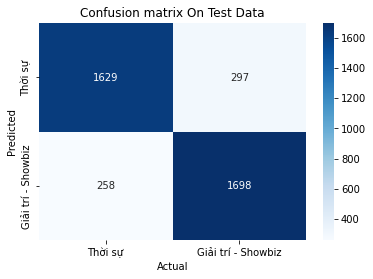

In [22]:
new_cm = pd.DataFrame(cm, index=[
                      'Thời sự', 'Giải trí - Showbiz'], columns=['Thời sự', 'Giải trí - Showbiz'])
sns.heatmap(new_cm, cmap='Blues', annot=True, fmt='', xticklabels=[
            'Thời sự', 'Giải trí - Showbiz'], yticklabels=['Thời sự', 'Giải trí - Showbiz'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()


## GAUSSIAN NAIVE BAYES

In [23]:


classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

### Confusion matrix

In [24]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1530  396]
 [ 253 1703]]


### Report

In [25]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1926
           1       0.81      0.87      0.84      1956

    accuracy                           0.83      3882
   macro avg       0.83      0.83      0.83      3882
weighted avg       0.83      0.83      0.83      3882



In [26]:

print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100, 2)))


Accuracy: 83.28


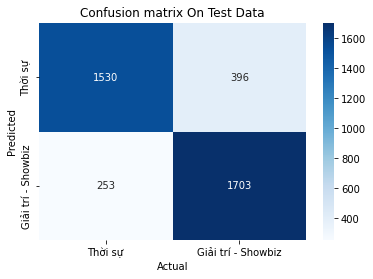

In [27]:
new_cm = pd.DataFrame(cm, index=[
                      'Thời sự', 'Giải trí - Showbiz'], columns=['Thời sự', 'Giải trí - Showbiz'])
sns.heatmap(new_cm, cmap='Blues', annot=True, fmt='', xticklabels=[
            'Thời sự', 'Giải trí - Showbiz'], yticklabels=['Thời sự', 'Giải trí - Showbiz'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()


## BERNOULLI NAIVE BAYES

In [28]:

classifier = BernoulliNB()
classifier.fit(X_train, y_train)


BernoulliNB()

### Confusion Matrix

In [29]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1531  395]
 [ 262 1694]]


### Report

In [30]:
print(classification_report(y_test, y_pred))
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100, 2)))


              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1926
           1       0.81      0.87      0.84      1956

    accuracy                           0.83      3882
   macro avg       0.83      0.83      0.83      3882
weighted avg       0.83      0.83      0.83      3882

Accuracy: 83.08


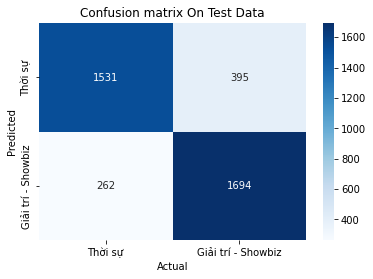

In [31]:
new_cm = pd.DataFrame(cm, index=[
                      'Thời sự', 'Giải trí - Showbiz'], columns=['Thời sự', 'Giải trí - Showbiz'])
sns.heatmap(new_cm, cmap='Blues', annot=True, fmt='', xticklabels=[
            'Thời sự', 'Giải trí - Showbiz'], yticklabels=['Thời sự', 'Giải trí - Showbiz'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()


## SUPPORT VECTOR MACHINES

In [32]:


classifier = NuSVC(max_iter=200)
classifier.fit(X_train, y_train)


/home/azulgrana2k1/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


NuSVC(max_iter=200)

### Confusion Matrix

In [33]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1339  587]
 [ 159 1797]]


### Report

In [34]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1926
           1       0.75      0.92      0.83      1956

    accuracy                           0.81      3882
   macro avg       0.82      0.81      0.81      3882
weighted avg       0.82      0.81      0.81      3882



In [35]:
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100, 2)))


Accuracy: 80.78


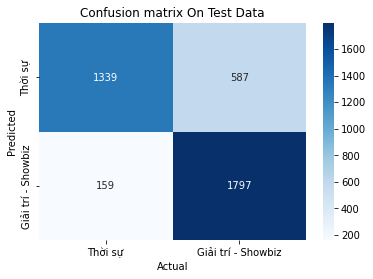

In [36]:
new_cm = pd.DataFrame(cm, index=[
                      'Thời sự', 'Giải trí - Showbiz'], columns=['Thời sự', 'Giải trí - Showbiz'])
sns.heatmap(new_cm, cmap='Blues', annot=True, fmt='', xticklabels=[
            'Thời sự', 'Giải trí - Showbiz'], yticklabels=['Thời sự', 'Giải trí - Showbiz'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()
